In [1]:
import pandas as pd

DATA = '/kaggle/input/spotify-podcasts-mental-disorders/podcasts.csv'
df = pd.read_csv(filepath_or_buffer=DATA).drop(columns=['id'])
df.head()

,name,publisher,description,total_episodes,languages,media_type,explicit
0,[MHA Podfic] Sharper Than a Serpent's Tooth,PurpleStar,This is a My Hero Academia podfic (fanfic audi...,10,['en'],audio,True
1,#Unfollow: Breaking Social Media Addictions,Unfollow,#Unfollow is a podcast featuring informative t...,22,['en'],mixed,False
2,Actively Autistic,Actively Autistic,The community that was created on Facebook and...,75,['en'],audio,True
3,ADHD Awareness: Understanding Girls & Women wi...,ADHD Awareness Month,"Our podcast features Ellen B. Littman, a clini...",2,['en-US'],audio,False
4,ADHD Book Club,Distracted Dialogues,ADHD Book Club is a podcast that celebrates re...,75,['en'],audio,True


In [2]:
df.shape

(193, 7)

Do we have any publishers that produce multiple podcasts?

In [3]:
df['publisher'].value_counts().head(n=5)

publisher
Princess of Suburbia®Network    2
Carl Jung                       2
Sergio Suárez Benítez           2
Liron Cohen                     2
PurpleStar                      1
Name: count, dtype: int64

We have literally a handful.

How many episodes do podcasts in our dataset run?

In [4]:
df['total_episodes'].mean(), df['total_episodes'].median(), df['total_episodes'].value_counts().head(n=1)

(79.29533678756476,
 30.0,
 total_episodes
 1    17
 Name: count, dtype: int64)

Interestingly there are several that ran exactly one episode, but there are lots that run only a few. Let's look at the whole distribution.

<Axes: xlabel='total_episodes', ylabel='Count'>

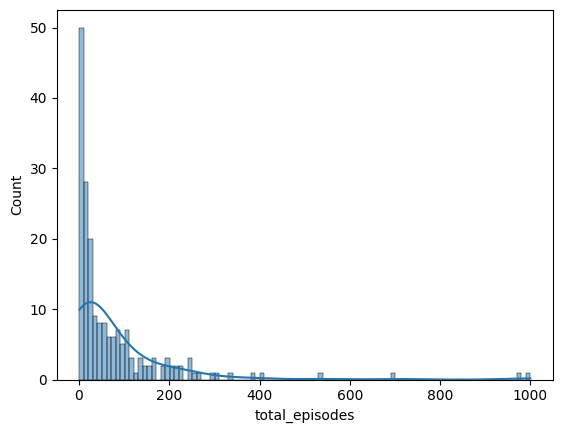

In [5]:
from seaborn import histplot
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)
histplot(data=df, x='total_episodes', bins=100, kde=True)


Do we have an expectation for how many episodes in our dataset are audio and how many are not?

<Axes: xlabel='media_type', ylabel='count'>

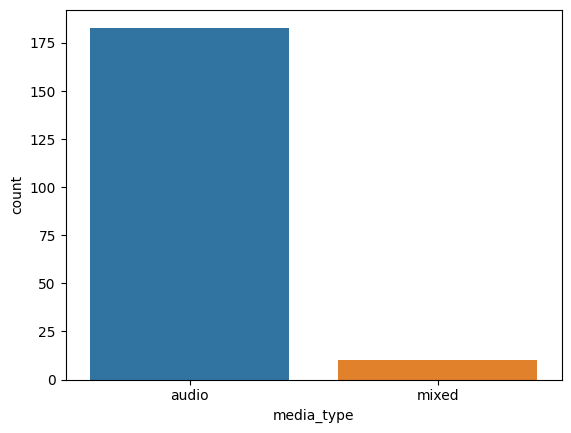

In [6]:
from seaborn import barplot

barplot(data=df['media_type'].value_counts().to_frame().reset_index(), x='media_type', y='count')

It is probably not surprising that almost all of our podcasts are audio podcasts. What about explicit language?

<Axes: xlabel='explicit', ylabel='count'>

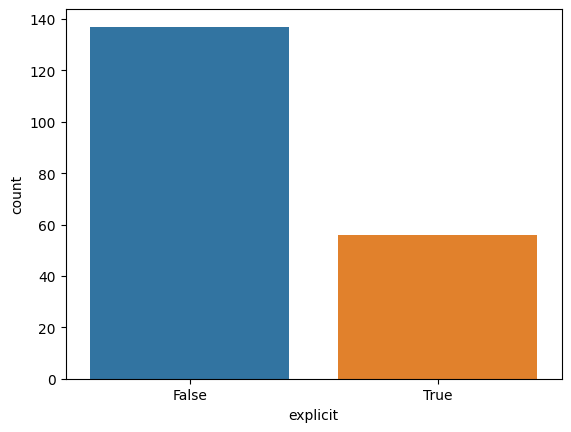

In [7]:
barplot(data=df['explicit'].value_counts().to_frame().reset_index(), x='explicit', y='count')